In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('transformed_dataset.csv')

Saving transformed_dataset.csv to transformed_dataset (3).csv


#Work begins

In [ ]:
df.head()

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb
0,CUST_000001,45,Suburban,110,1.40,525,0.00,1,0,2,0.000000
1,CUST_000002,38,Rural,31,5.04,525,0.00,0,0,5,0.000000
2,CUST_000003,47,Urban,24,2.60,525,0.00,0,1,5,0.000000
3,CUST_000004,58,Rural,50,0.50,525,0.00,0,0,2,0.000000
4,CUST_000005,37,Suburban,11,5.13,525,2.81,1,0,5,21.615385


In [ ]:
#Using logistic regression at first
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
x=df[["monthly_data_gb","call_minutes","overage_charges","current_plan_gb"]]
y=df["target_upgrade"]

<Axes: ylabel='overage_charges'>

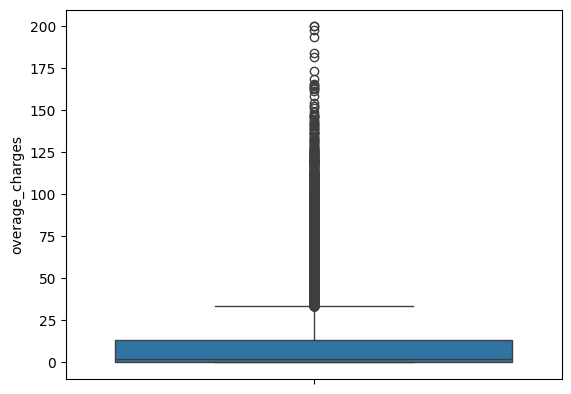

In [ ]:
sns.boxplot(df["overage_charges"])

In [ ]:
#25th percentile= Q1
#75th percentile= Q3
#Inter Quartile range= Q3-Q1
#Outliers in the column of overage_charges are those having value below Q1-1.5*IQR and Q3+1.5*IQR

# Q1 = df['overage_charges'].quantile(0.25)
# Q3 = df['overage_charges'].quantile(0.75)

# IQR= Q3-Q1
# low_bound= Q1-1.5*IQR
# upper_bound=Q3+1.5*IQR
# count=0
# for val in df["overage_charges"]:
#   if(val<low_bound):
#     val=low_bound
#   if(val>upper_bound):
#     val=upper_bound
#   df["overage_charges"][count]=val
#   count+=1

df["overage_charges"]=df["overage_charges"].clip(lower=0,upper=upper_bound)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_test

,monthly_data_gb,call_minutes,overage_charges,current_plan_gb
6868,8.03,189,35.00,5
24016,8.85,525,44.31,5
9668,4.16,189,3.94,5
13640,1.95,525,0.06,2
14018,4.90,525,0.00,5
...,...,...,...,...
8670,1.50,525,0.00,2
11839,6.12,525,12.94,5
4013,11.38,525,17.37,10
21147,5.94,189,9.64,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
#X_train["region"]=le.fit_transform(X_train["region"])
#X_test["region"]=le.transform(X_test["region"])

In [ ]:
X_train["call_minutes"]=le.fit_transform(X_train["call_minutes"])
X_test["call_minutes"]=le.transform(X_test["call_minutes"])
X_train

,monthly_data_gb,call_minutes,overage_charges,current_plan_gb
23311,0.72,1,3.33,2
23623,1.21,1,1.95,2
1020,6.83,1,19.78,5
12645,0.93,1,0.00,2
1533,4.45,1,0.00,5
...,...,...,...,...
21575,6.38,1,16.67,5
5390,1.48,0,4.59,2
860,5.18,1,2.27,5
15795,3.37,1,0.00,5


In [ ]:
df.isnull().sum()

,0
customer_id,0
age,0
region,0
tenure_months,0
monthly_data_gb,0
call_minutes,0
overage_charges,0
previous_upgrades,0
target_upgrade,0
current_plan_gb,0


In [ ]:
X_train["monthly_data_gb"]=np.log1p(X_train["monthly_data_gb"])
X_test["monthly_data_gb"]=np.log1p(X_test["monthly_data_gb"])

X_train["overage_charges"]=np.log1p(X_train["overage_charges"])
X_test["overage_charges"]=np.log1p(X_test["overage_charges"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1= LabelEncoder()

X_train["current_plan_gb"]=le1.fit_transform(X_train["current_plan_gb"])
X_test["current_plan_gb"]=le1.transform(X_test["current_plan_gb"])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [ ]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
df["monthly_data_gb"].value_counts()

,count
monthly_data_gb,
0.10,436
1.33,67
1.09,67
1.15,64
1.03,62
...,...
16.51,1
19.14,1
22.18,1


In [ ]:
df[df["monthly_data_gb"]<=0]

,customer_id,age,region,tenure_months,monthly_data_gb,call_minutes,overage_charges,previous_upgrades,target_upgrade,current_plan_gb,overcharge_per_gb


In [ ]:
X_test[:,3]

array([ 0.37152675,  0.37152675,  0.37152675, ...,  1.76771898,
        0.37152675, -1.02466548])

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7216

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred1=rf.predict(X_test)
accuracy_score(y_test,y_pred1)

0.66

In [ ]:
df['target_upgrade'].value_counts(normalize=True) * 100

,proportion
target_upgrade,
0,54.744
1,45.256
